In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical #onehot
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style="white",context="notebook",palette="deep")

Using TensorFlow backend.


In [0]:
from google.colab import files

In [3]:
upload1 = files.upload()

Saving train.csv to train.csv


In [5]:
upload2 = files.upload()

Saving test.csv to test.csv


In [0]:
import io

In [0]:
#Loading dataset
train=pd.read_csv(io.StringIO(upload1['train.csv'].decode('utf-8')))
test=pd.read_csv(io.StringIO(upload2['test.csv'].decode('utf-8')))

In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [12]:
train.shape

(42000, 785)

In [13]:
test.shape

(28000, 784)

In [0]:
X_train = train.drop(labels=["label"],axis=1)
Y_train = train["label"]

del train

In [15]:
Y_train.shape

(42000,)

## Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

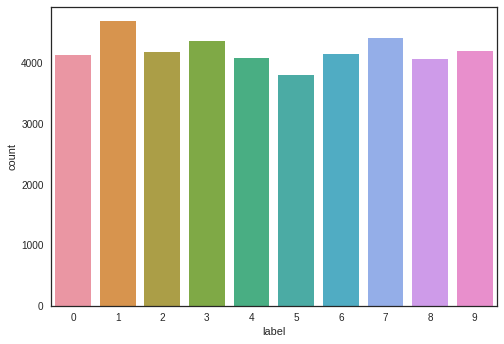

In [16]:
g = sns.countplot(Y_train)
Y_train.value_counts()

## Missing values/Null values

In [17]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [19]:
Y_train.isnull().any()

False

In [20]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

## Normalization of the data

In [0]:
X_train = X_train / 255.0

In [0]:
test = test / 255.0

## Reshape

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [24]:
X_train.shape

(42000, 28, 28, 1)

In [25]:
test.shape

(28000, 28, 28, 1)

## One-Hot encoding for Y_train

In [0]:
Y_train=to_categorical(Y_train,num_classes=10)

In [27]:
Y_train.shape

(42000, 10)

## Train/Test Split

In [0]:
random_seed = 2
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,random_state=random_seed)

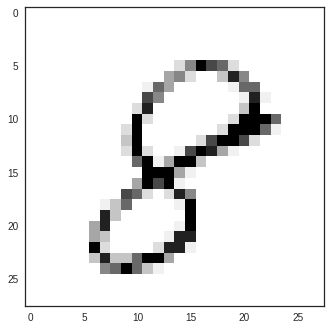

In [29]:
plt.imshow(X_train[0,:,:,0]) #or plt.imshow(X_train[0][:,:,0])

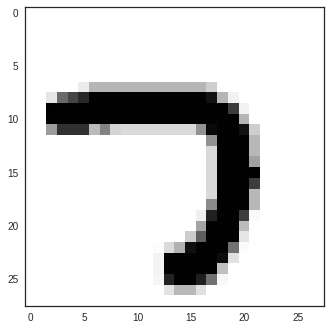

In [30]:
plt.imshow(X_train[25,:,:,0])

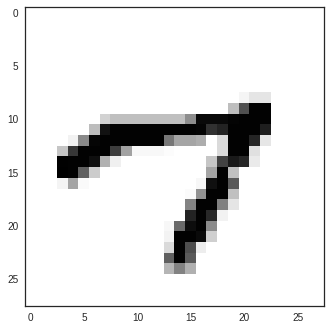

In [31]:
plt.imshow(X_train[2019,:,:,0])

## Actually building the CNN

In [0]:
# model = Sequential()

# model.add(Conv2D(filters=32,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(28,28,1)))
# model.add(Conv2D(filters=32,kernel_size=(5,5),padding="Same",activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(256,activation="relu"))
# model.add(Dense(10,activation="relu"))


# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [0]:
optimizer=RMSprop(lr=0.001,rho=0.9,epsilon=1e-08,decay=0.0)

In [0]:
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
learning_rate_reduction=ReduceLROnPlateau(monitor="val_acc",patience=3,verbose=1,factor=0.5,min_lr=0.00001)


In [0]:
epochs=30 #Turn this to 30 for 99.67% accuracy
batch_size=86

## Data Augmentation

In [0]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [38]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 15s - loss: 0.4109 - acc: 0.8690 - val_loss: 0.0704 - val_acc: 0.9790
Epoch 2/30
 - 12s - loss: 0.1253 - acc: 0.9621 - val_loss: 0.0418 - val_acc: 0.9862
Epoch 3/30
 - 12s - loss: 0.0937 - acc: 0.9726 - val_loss: 0.0398 - val_acc: 0.9869
Epoch 4/30
 - 12s - loss: 0.0790 - acc: 0.9770 - val_loss: 0.0283 - val_acc: 0.9929
Epoch 5/30
 - 13s - loss: 0.0715 - acc: 0.9795 - val_loss: 0.0265 - val_acc: 0.9924
Epoch 6/30
 - 12s - loss: 0.0675 - acc: 0.9810 - val_loss: 0.0262 - val_acc: 0.9917
Epoch 7/30
 - 12s - loss: 0.0612 - acc: 0.9820 - val_loss: 0.0228 - val_acc: 0.9936
Epoch 8/30
 - 12s - loss: 0.0589 - acc: 0.9830 - val_loss: 0.0254 - val_acc: 0.9919
Epoch 9/30
 - 12s - loss: 0.0589 - acc: 0.9831 - val_loss: 0.0200 - val_acc: 0.9938
Epoch 10/30
 - 12s - loss: 0.0609 - acc: 0.9823 - val_loss: 0.0256 - val_acc: 0.9936
Epoch 11/30
 - 12s - loss: 0.0609 - acc: 0.9829 - val_loss: 0.0206 - val_acc: 0.9931
Epoch 12/30
 - 12s - loss: 0.0620 - acc: 0.9828 - val_loss: 0.0169 - val_a

## Evaluate model

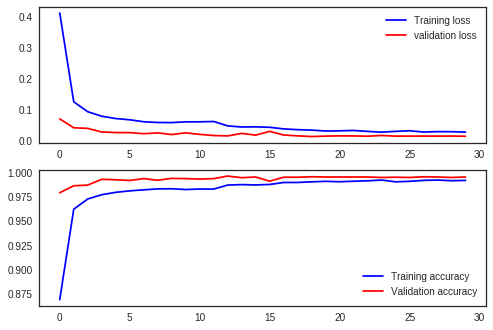

In [39]:
fig,ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='b',label='Training loss')
ax[0].plot(history.history['val_loss'],color='r',label='validation loss',axes=ax[0])
legend=ax[0].legend(loc='best',shadow=True)
ax[1].plot(history.history['acc'],color='b',label='Training accuracy')
ax[1].plot(history.history['val_acc'],color='r',label='Validation accuracy')
legend=ax[1].legend(loc='best',shadow=True)

## Confusion matrix

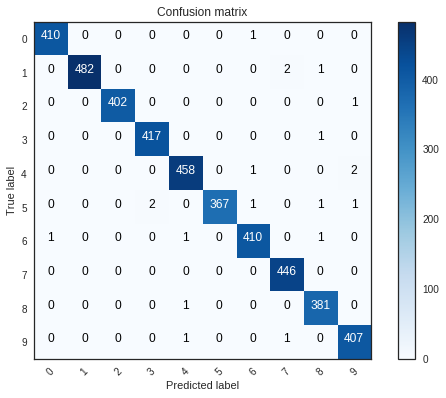

In [40]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

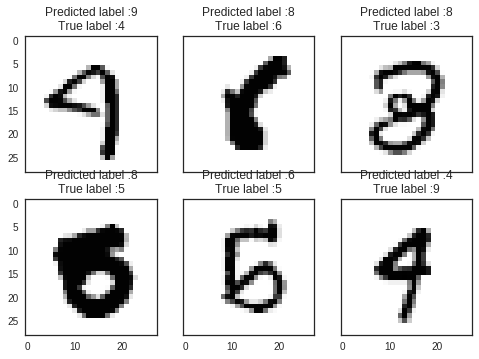

In [41]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [0]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)